# Matplotlib basics

After years of using it... and not always enjoying it, I am learning the basic in a structured way, from Jake Vanderplas' book *Python Data Science Handbook* [notebooks](https://github.com/jakevdp/PythonDataScienceHandbook/notebooks). It is about time!

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Here `notebook` is also an option, but it remains unclear what it does

In [21]:
plt.style.use('classic') # gotta love it

In [175]:
%matplotlib inline

In [7]:
d = np.linspace(0, 10)

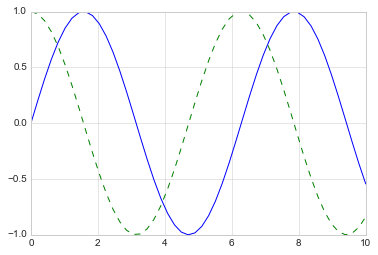

In [176]:
plt.plot(d, np.sin(d))
plt.plot(d, np.cos(d), '--')

> A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

No shit.

## Matlab style interface

Stateful

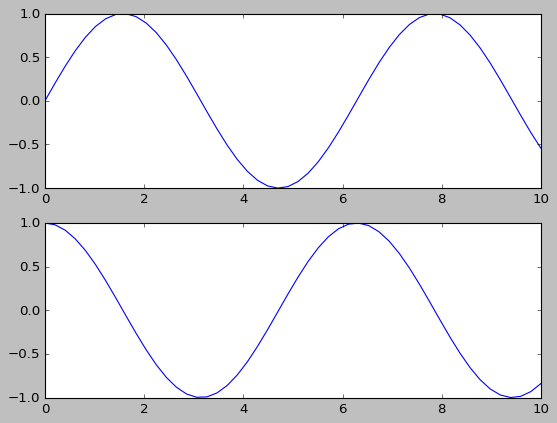

In [26]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(d, np.sin(d))

plt.subplot(2, 1, 2)
plt.plot(d, np.cos(d))

## OO interface

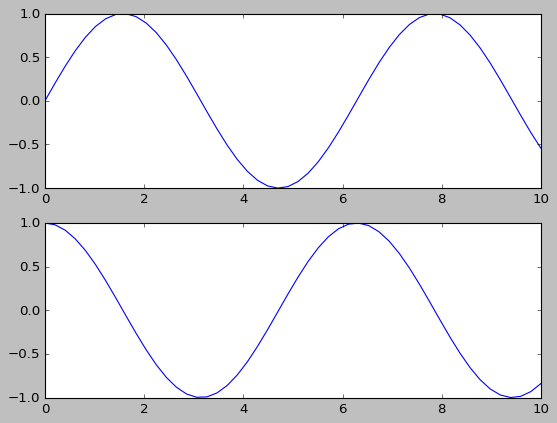

In [27]:
fix, ax = plt.subplots(2)
ax[0].plot(d, np.sin(d))
ax[1].plot(d, np.cos(d))

In [28]:
plt.style.use('seaborn-whitegrid')

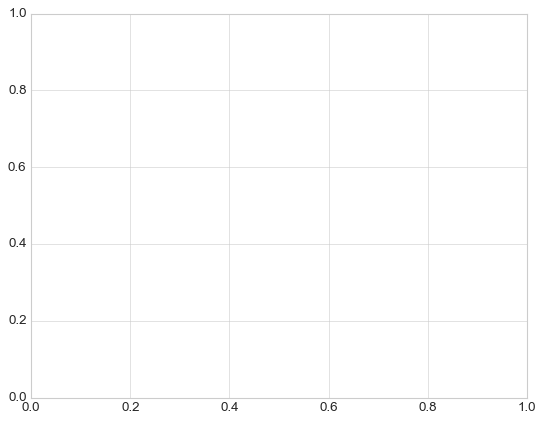

In [29]:
fix = plt.figure()
ax = plt.axes()

My confusions with what an *axes* and *axis* are was pretty bad and lasted long.

> note here the potential confusion between axes with an *e*, and axis with an *i*

Yeap

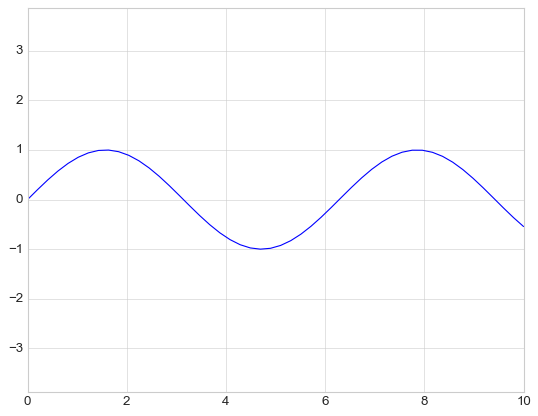

In [33]:
plt.axis([-1, 1, -1, 1])
plt.axis('equal') # screen aspect ratio, nice
plt.plot(d, np.sin(d))

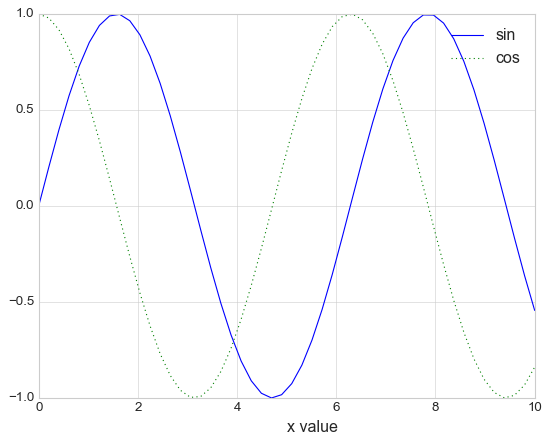

In [45]:
plt.plot(d, np.sin(d), label='sin')
plt.plot(d, np.cos(d), ':g', label='cos')

plt.xlabel("x value", horizontalalignment='left', fontsize='large')
plt.legend()

* plt.xlabel() → ax.set_xlabel()
* plt.ylabel() → ax.set_ylabel()
* plt.xlim() → ax.set_xlim()
* plt.ylim() → ax.set_ylim()
* plt.title() → ax.set_title()

And in the OO interface, often it is useful to call `ax.set()` to set all kinds of things at once.

[(-0.5, 1.5),
 Text(0,0.5,'sin($x$)'),
 (0, 10),
 Text(0.5,0,'x'),
 Text(0.5,1,'A plot')]

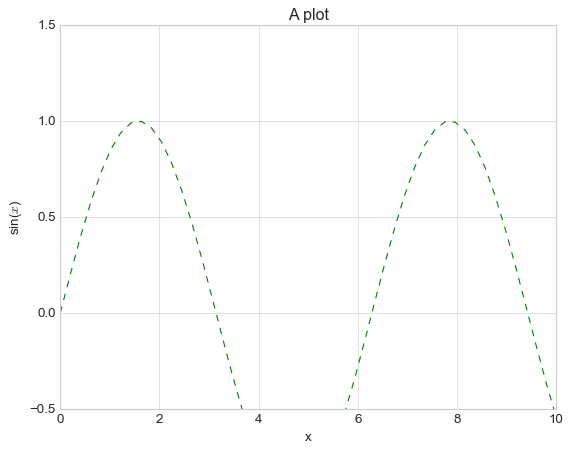

In [55]:
ax = plt.axes()
ax.plot(d, np.sin(d), 'g--')
ax.set(xlim=(0, 10), ylim=(-0.5, 1.5),
    xlabel='x', ylabel='sin($x$)',
    title='A plot')

In [57]:
print(ax)

AxesSubplot(0.125,0.1;0.775x0.8)


Good, that gives me discipline. Nice. I want to use `plt.axes` from now on, and capture the object reference... I think.

...reading on.

Now, with scatter plots we map data to visuals

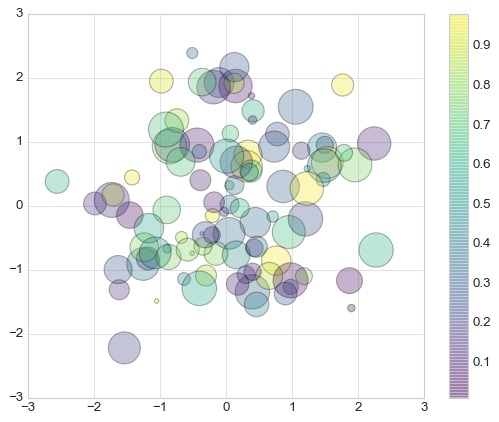

In [60]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()

Irises (*ires*?)

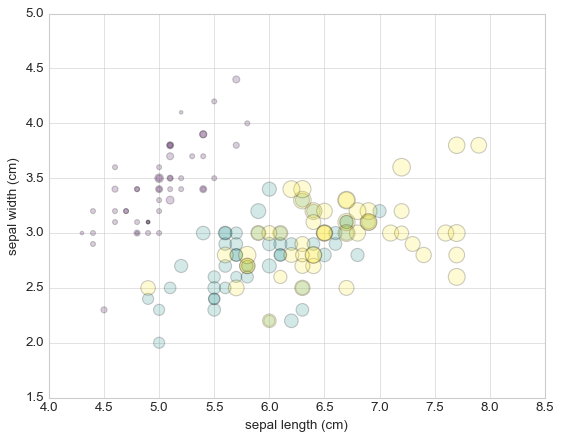

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

irisplt = plt.axes()
irisplt.scatter(features[0], features[1], alpha=0.2,
                s=100*features[3], c=iris.target, cmap='viridis')
irisplt.set(xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1]);

In [73]:
type(irisplt)

matplotlib.axes._subplots.AxesSubplot

> For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe. I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.
>
> Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

Nice

In [ ]:
np.random.randn

<Container object of 3 artists>

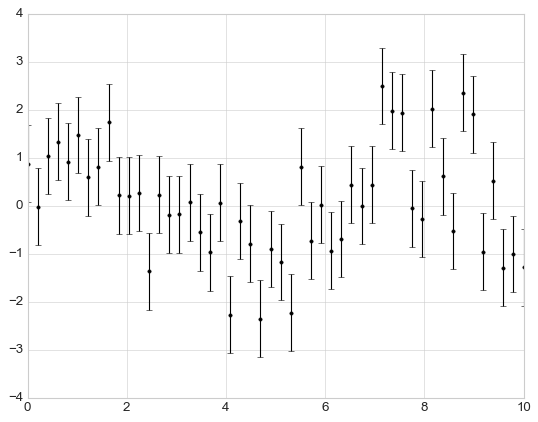

In [76]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

Again state was created though.

<Container object of 3 artists>

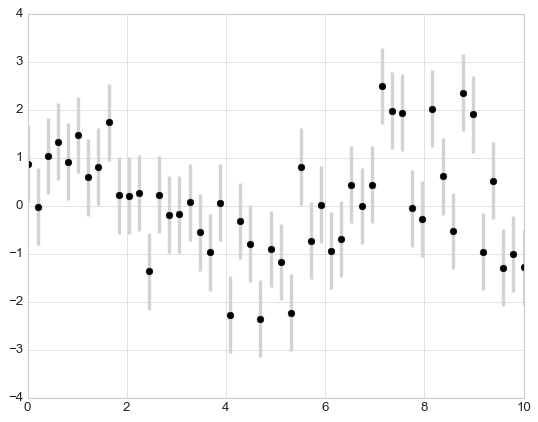

In [77]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
            ecolor='lightgrey', elinewidth=3, capsize=0)

Continuous error with `plt.fill_between` is given. E.g. *Gaussian process regression*.

In [88]:
from sklearn.gaussian_process import GaussianProcess

# Define the model and draw some data
model = lambda x: x * np.sin(x) # ok I see what you did
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata) # Numpy broadcasting

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic',
                     theta0=1e-2,
                    thetaL=1e-4,
                    thetaU=1e-1,
                    random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versio

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3

Ok deprecation of the `GaussianProcess` is underway.

[(0, 10)]

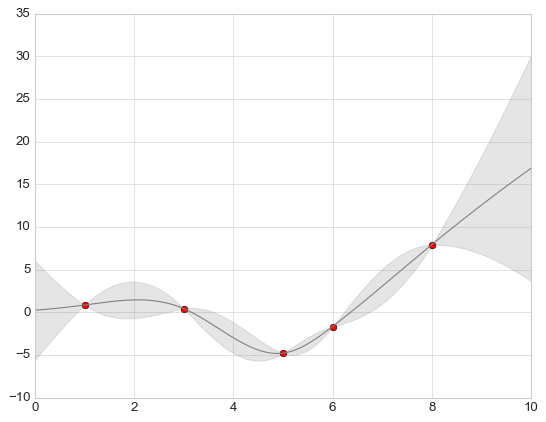

In [90]:
gplt = plt.axes()
gplt.plot(xdata, ydata, 'or')
gplt.plot(xfit, yfit, '-', color='gray')
gplt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
gplt.set(xlim=(0, 10))

Contours with `plt.contour`, `plt.countourf` and `plt.imshow`.

In [109]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Use of `np.meshgrid`

In [110]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

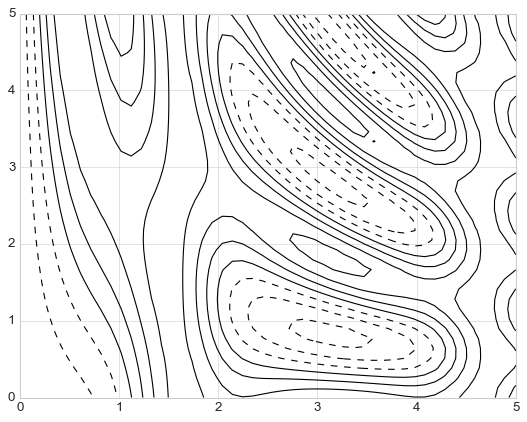

In [113]:
contb = plt.contour(X, Y, Z, colors='black')

Negative values are dashed, positive solid.

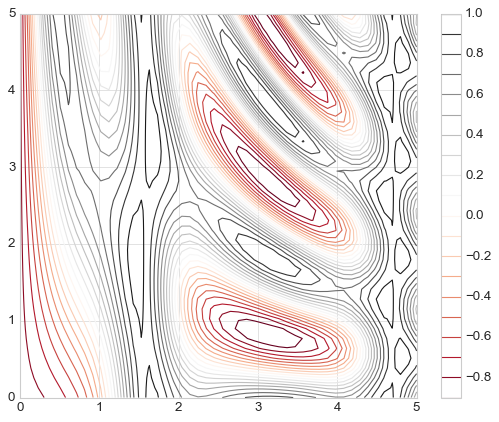

In [115]:
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

Same, with filling

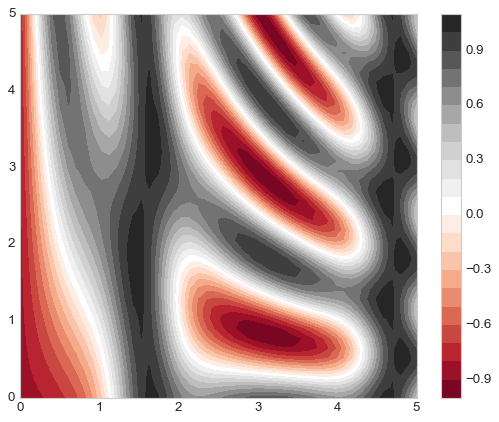

In [122]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

Lost count of the object reference... Should use `contcf = plt.axes()` at all times to maintain sanity.

Use of `plt.imshow`. And here's a combination, with a semiopaque image and contours.

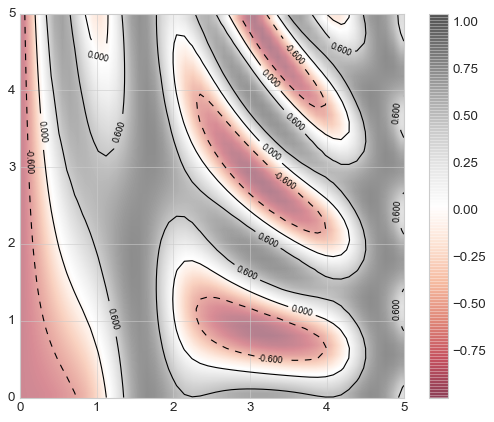

In [124]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

Stuff on histograms. There's also the hexagonal 2D histogram

In [127]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

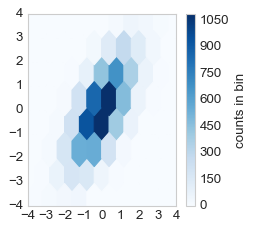

In [160]:
fig, hx = plt.subplots(figsize=(3, 3))
hb = hx.hexbin(x, y, gridsize=10, cmap='Blues')
hx.set(xlim=(-4, 4), ylim=(-4, 4))
#cb = plt.colorbar(hb, label='count in bin', )
plt.colorbar(hb, label='counts in bin')

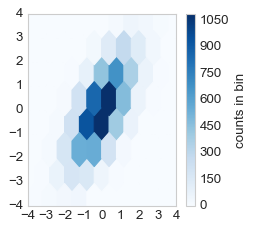

In [161]:
fig

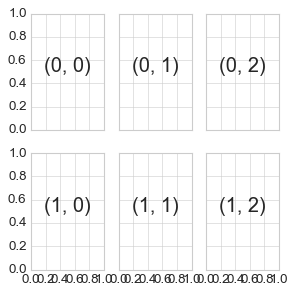

In [167]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(4, 4))
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

Object-oriented command is `fig.add_subplot()`. Anyway

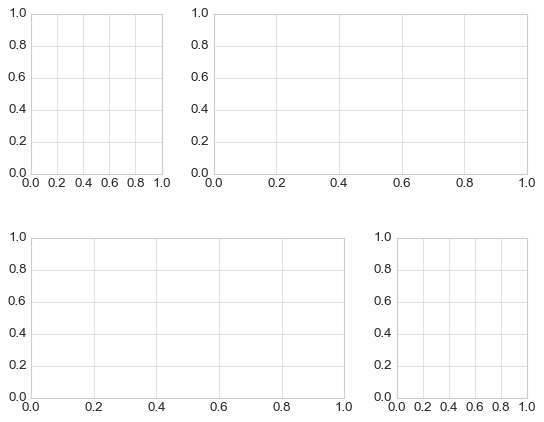

In [172]:
weirdgrid = plt.figure()
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.4)
weirdgrid.add_subplot(grid[0, 0])
weirdgrid.add_subplot(grid[0, 1:])
weirdgrid.add_subplot(grid[1, :2])
weirdgrid.add_subplot(grid[1, 2]);

Use `plt.annotate()`, not `plt.arrow()`.

Axis locators and formatters.

Styling, `plt.rc`, and context too

    with plt.style.context('stylename'):
        make_a_plot()

In [177]:
from mpl_toolkits import mplot3d

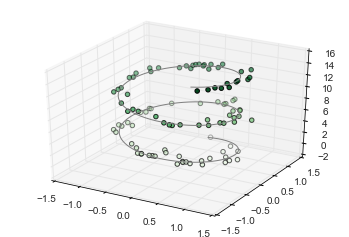

In [183]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

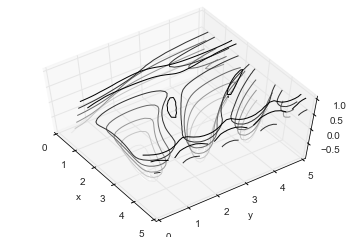

In [190]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, -35)
ax.contour3D(X, Y, Z)

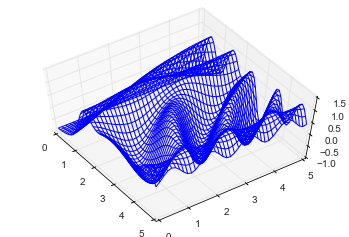

In [192]:
ax = plt.axes(projection='3d')
ax.view_init(60, -35)
ax.plot_wireframe(X, Y, Z)

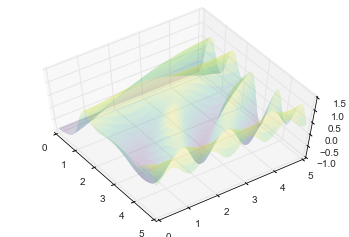

In [200]:
ax = plt.axes(projection='3d')
ax.view_init(60, -35)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none',
               alpha=0.2)